# Assignment: 03/01/2025

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Take a photo on phone camera and Read the photo and display it using python. Print width, height, and MegaPixel count.

In [2]:
#FROM DOCUMENTATION:
#In the case of color images, the decoded images will have the channels stored in B G R order.
cam_image = cv2.imread('sample_cam_image.jpg')
cam_image = cam_image[..., [2, 1, 0]] 

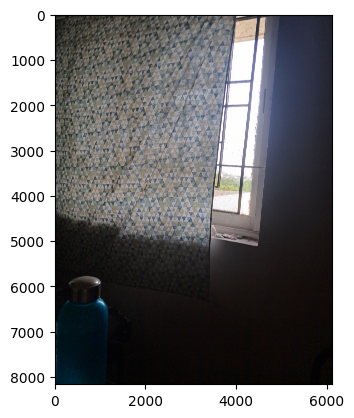

In [3]:
plt.imshow(cam_image)

In [4]:
shape = cam_image.shape
shape

(8160, 6120, 3)

In [5]:
img_height = shape[0]
img_width = shape[1]
pixel_count = img_height * img_width
pixel_count

49939200

In [6]:
mp_count = int(pixel_count / 1e6 + 1)
mp_count

50

In [7]:
print(f"Height\t:{img_height}\nWidth\t:{img_width}\nMP\t:{mp_count}")

Height	:8160
Width	:6120
MP	:50


## 2. Print the RGB values of the center pixel of the image.

In [8]:
b_cent, g_cent, r_cent = cam_image[img_height//2][img_width//2]

In [9]:
print(f"Center pixel\nR: {r_cent}\nG: {g_cent}\nB: {b_cent}")

Center pixel
R: 144
G: 129
B: 120


## 3. Convert the RGB image to gray image.

In [10]:
scaled_cam_image = cam_image.copy()
scaled_cam_image[:,:,0] = np.asarray(scaled_cam_image[:,:,0] * 0.299, dtype=int) # reds
scaled_cam_image[:,:,1] = np.asarray(scaled_cam_image[:,:,1] * 0.587, dtype=int) # greens
scaled_cam_image[:,:,2] = np.asarray(scaled_cam_image[:,:,2] * 0.114, dtype=int) # blues

In [11]:
grayscale_image = scaled_cam_image.sum(axis=2)

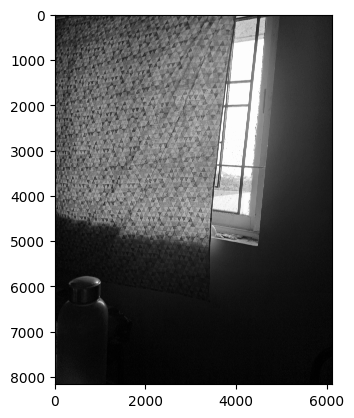

In [12]:
# FROM DOCUMENTATION:
# The input may either be actual RGB(A) data, or 2D scalar data, which
# will be rendered as a pseudocolor image. For displaying a grayscale
# image set up the colormapping using the parameters
# ``cmap='gray', vmin=0, vmax=255``.
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)

# 4. On the gray image, add and subtract 50 to each pixel and display both images with the original gray image.

In [13]:
low_grayscale_image = grayscale_image - 50
high_grayscale_image = grayscale_image + 50

Text(0.5, 1.0, 'Grayscale Image -50')

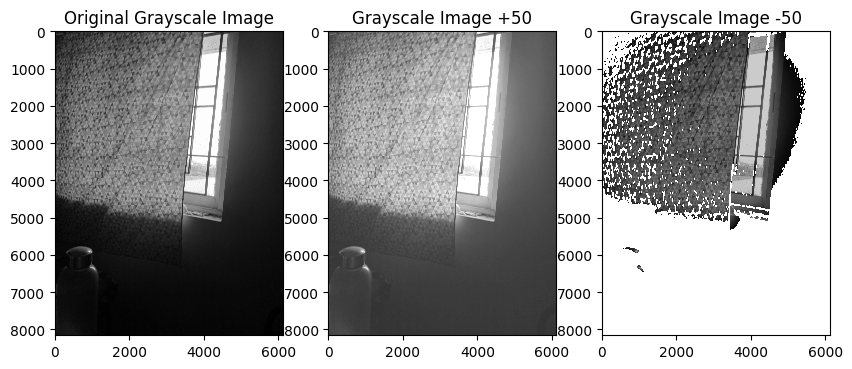

In [14]:
plt.figure(figsize=(10, 15))

plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title("Original Grayscale Image")

plt.subplot(1, 3, 2)
plt.imshow(high_grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Image +50")

plt.subplot(1, 3, 3)
plt.imshow(low_grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Image -50")

## 5. On the gray image, subtract 50 from all the pixels having values 0-100. Add 50 to all pixels having pixel values 150-255.

In [15]:
contrasted_image = np.zeros_like(grayscale_image)
contrasted_image.shape

(8160, 6120)

In [ ]:
for i in range(img_height):
    for j in range(img_width):
        if grayscale_image[i][j] <= 100:
            contrasted_image[i][j] = grayscale_image[i][j] - 50
        elif grayscale_image[i][j] >= 150:
            contrasted_image[i][j] = grayscale_image[i][j] + 50
        else:
            contrasted_image[i][j] = grayscale_image[i][j]

In [ ]:
plt.imshow(contrasted_image, cmap='gray', vmin=0, vmax=255)